# Best Neighborhood decided by Group World Justice Returns!
We decided that the best neighborhood in Pittsburgh is determined by the one you are most likely to die in. Using the arrest data, fire data, and pools data, we were able to declare a single best neighborhood in Pittsburgh.

## Jaclyn Kim: Crime Rate

#### Import Statements

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

arrest = pd.read_csv("arrests.csv")

### Not all arrests could or will result in a death so...
I limited it to more severe offenses: Harassment, stalking, homicide, assault, misuse of firearms, reckless driving, terroristic threats, kidnapping, murder, strangulation, and missiles.

**Fun fact**: I thought missiles would be like the weapon used to blow stuff up but actually anything that is launched towards an "occupied vehicle" or onto a road can be considered a missile. Something simple as throwing rocks and sticks at cars is considered to be launching of a missile and is a criminal offense. . .  so don't do it, not that anyone should have been doing it anyways.

In [3]:
severity = arrest['OFFENSES'].str.contains('Harassment|Stalking|Homicide|Assault|Firearms|Missiles|Reckless Driving|Terroristic Threats|Kidnapping|Murder|Strangulation', regex = True).fillna(False)
crimes = arrest[severity]
crimes.sample(5)

PK       CCR   AGE GENDER RACE           ARRESTTIME  \
10217  1987423  17073494  35.0      F    W  2017-07-03T16:44:00   
15835  1994461  17240785  26.0      M    W  2017-12-15T00:47:00   
28969  2011290  17173483   NaN      M    B  2019-03-11T10:05:00   
40121  2025758  20053984  46.0      F    W  2020-03-18T04:32:00   
21559  2001858  18116464  19.0      F    B  2018-06-24T17:00:00   

                                    ARRESTLOCATION  \
10217                                       Zone 3   
15835  1400 Block E Carson ST Pittsburgh, PA 15203   
28969        600 Block 1ST AV Pittsburgh, PA 15219   
40121     2300 Block Carey WY Pittsburgh, PA 15203   
21559  1600 Block Brighton PL Pittsburgh, PA 15212   

                                                OFFENSES  \
10217  3929 Retail Theft. / 4304(a)(1) Endangering We...   
15835  2706 Terroristic Threats. / 5505 Public Drunke...   
28969  2706 Terroristic Threats. / 2701(a)(3) Simple ...   
40121  2701 Simple Assault. / 13(a)(16) Possession of...   
21559  2701 Simple Assault. / 2701(a)(3) Simple Assau...   

                                  INCIDENTLOCATION  INCIDENTNEIGHBORHOOD  \
10217                                       Zone 1                   NaN   
15835  1400 Block E Carson ST Pittsburgh, PA 15203      South Side Flats   
28969    300 Block Bausman ST Pittsburgh, PA 15210             Knoxville   
40121     2300 Block Carey WY Pittsburgh, PA 15203      South Side Flats   
21559  1600 Block Brighton PL Pittsburgh, PA 15212  California-Kirkbride   

      INCIDENTZONE  INCIDENTTRACT  COUNCIL_DISTRICT  PUBLIC_WORKS_DIVISION  \
10217            1            NaN               NaN                    NaN   
15835            3         1702.0               3.0                    3.0   
28969            3         3001.0               3.0                    5.0   
40121            3         1609.0               3.0                    3.0   
21559            1         2507.0               6.0                    1.0   

               X          Y  
10217        NaN        NaN  
15835 -79.984031  40.428649  
28969 -79.993111  40.414136  
40121 -79.973059  40.427849  
21559 -80.016966  40.457883

This restriction takes the original arrest dataframe and reduces it by **33,512** datapoints.

### Graphs data

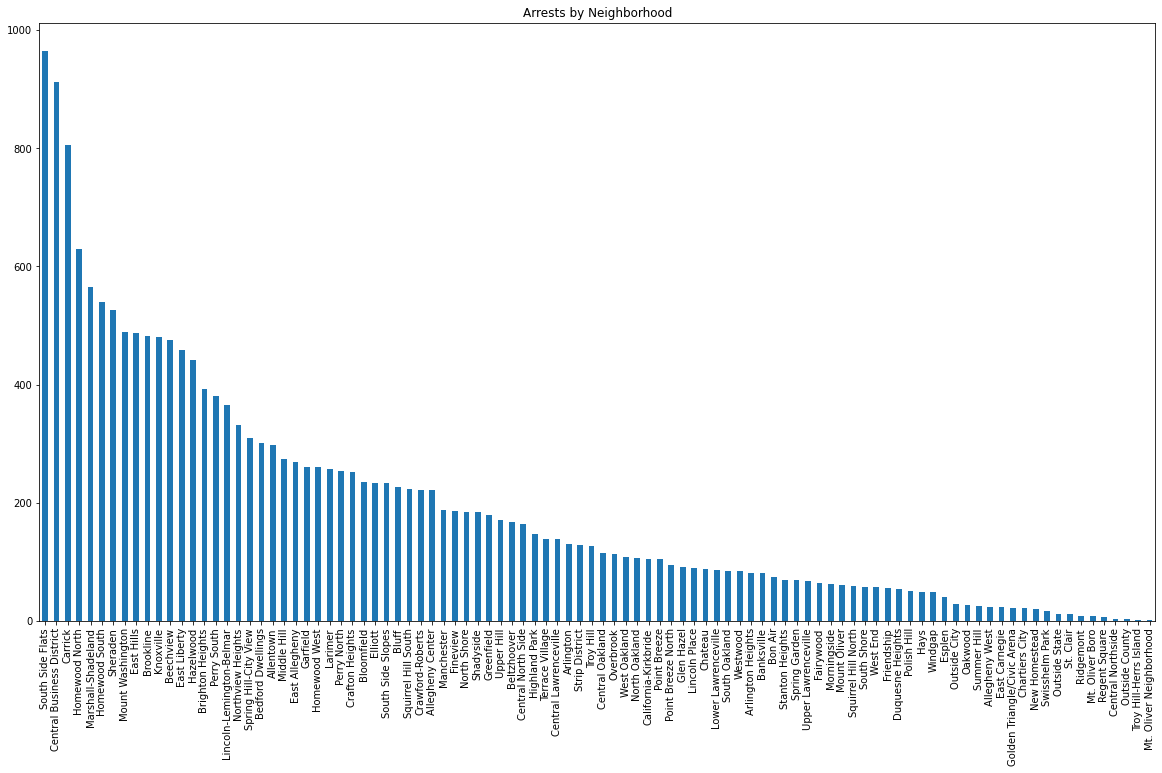

In [31]:
arrestNeighborhood = crimes["INCIDENTNEIGHBORHOOD"]
numArrest = crimes["INCIDENTNEIGHBORHOOD"].value_counts()
numArrest.sort_values(ascending = False).plot.bar(figsize=(20,11), title = "Arrests by Neighborhood")

Although the barchart illustrates the data, it is a headache to look at so using a **Choropleth map** we can better visualize the dense data.

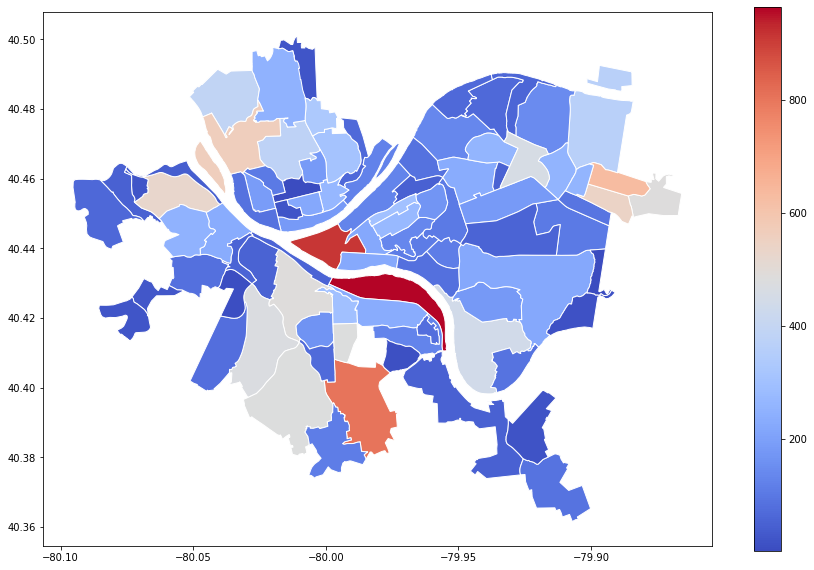

In [48]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
crimeMap = neighborhoods.merge(numArrest, how='left', left_on='hood', right_index = True)
crimeMap[['hood','INCIDENTNEIGHBORHOOD','geometry']].head()
crimeMap.plot(column='INCIDENTNEIGHBORHOOD', cmap='coolwarm', edgecolor="white", legend=True, figsize=(15, 10))

Before I filtered through the more severe crimes, the highest number of arrests was in the Central Business District but when restricted to the more severe offenses, **South Side Flats** surpassed Central Business District by 52 arrests. On the Choropleth map, we can see that the darker the red, the more arrests there were in that neighborhood. The burgundy/wine red is **South Side Flats**, then we go over the Manongahela River to second place, *Central Business District*, and lastly, we travel south to third place, *Carrick*.

# Wabona Dandi: Fires

## Which neighborhood in Pittsburgh has the most amount of fires that occur? The one with the most amount of fires would mean that it is the unsafest, and overall best neighborhood to live in based on our goal.

# Importing Data

## The data contains the csv file that has the metrics needed to determine which neighborhood has the most fires. 
##### I plan to use this data throughout my findings. 

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt

dataset = pd.read_csv("Fires.csv")
dataset

call_no  incident_type             type_description  \
0     F160029985          111.0                Building fire   
1     F180022058          111.0                Building fire   
2     F180022102          131.0       Passenger vehicle fire   
3     F170043431          131.0       Passenger vehicle fire   
4     F180021111          111.0                Building fire   
...          ...            ...                          ...   
8423  F220022447          111.0                Building fire   
8424  F220021639          131.0       Passenger vehicle fire   
8425  F220022826          150.0  Outside rubbish fire, Other   
8426  F220023419          150.0  Outside rubbish fire, Other   
8427  F220023799          131.0       Passenger vehicle fire   

                                              address           alarm_time  \
0           800 BLOCK CENTER ST, WILKINSBURG PA 15221  2016-04-21T05:01:04   
1            1100 BLOCK JANE ST, WILKINSBURG PA 15221  2018-03-13T08:34:43   
2      SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212  2018-03-13T11:54:23   
3          1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212  2017-05-31T08:39:47   
4          2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205  2018-03-09T10:26:42   
...                                               ...                  ...   
8423       4600 BLOCK ROSINA WAY, PITTSBURGH PA 15224  2022-03-31T22:07:32   
8424       1300 BLOCK CENTER ST, WILKINSBURG PA 15221  2022-03-29T02:18:18   
8425   2100 BLOCK BROWNSVILLE RD, PITTSBURGH PA 15210  2022-04-02T15:36:04   
8426  200 BLOCK THE BOULEVARD ST, PITTSBURGH PA 15226  2022-04-05T09:07:03   
8427            00 BLOCK I279 NB, PITTSBURGH PA 15212  2022-04-06T16:37:23   

      alarms primary_unit  census_tract neighborhood  council_district  ward  \
0          1      231EN16           NaN          NaN               NaN   NaN   
1          1      231EN16           NaN          NaN               NaN   NaN   
2          0      231EN32        2406.0          NaN               NaN   NaN   
3          0      231EN38        2509.0     Fineview               6.0  25.0   
4          1      231EN31        2808.0    Fairywood               2.0  28.0   
...      ...          ...           ...          ...               ...   ...   
8423       1      231EN06         903.0          NaN               NaN   NaN   
8424       0      231EN16           NaN          NaN               NaN   NaN   
8425       0      231EN22        2901.0      Carrick               4.0  29.0   
8426       0      231EN23        2902.0      Carrick               4.0  29.0   
8427       0      231EN38        2609.0          NaN               NaN   NaN   

             tract  public_works_division  pli_division  police_zone  \
0     4.200356e+10                    NaN           NaN          NaN   
1     4.200356e+10                    NaN           NaN          NaN   
2              NaN                    NaN           NaN          NaN   
3     4.200325e+10                    1.0          25.0          1.0   
4     4.200356e+10                    5.0          28.0          6.0   
...            ...                    ...           ...          ...   
8423           NaN                    NaN           NaN          NaN   
8424           NaN                    NaN           NaN          NaN   
8425  4.200329e+10                    3.0          29.0          3.0   
8426  4.200329e+10                    3.0          29.0          3.0   
8427           NaN                    NaN           NaN          NaN   

     fire_zone   latitude  longitude  
0         3-16  40.441275 -79.882485  
1         3-21  40.436342 -79.881003  
2         1-1A        NaN        NaN  
3         1-10  40.460303 -80.006980  
4         1-16  40.449009 -80.076607  
...        ...        ...        ...  
8423       3-6        NaN        NaN  
8424      3-16        NaN        NaN  
8425      4-12  40.393200 -79.986524  
8426      4-12  40.401099 -79.985736  
8427      1-13        NaN        NaN  

[8428 ro

####  Data provided by Western Pennsylvania Regional Data Center. 

## This csv file needs to be parsed and be made to be easier read.

Using the group by function will be able to split the data into something easier to digest.

I am sure now that having the neighborhoods and the amount of fires occur as the main stats to observe will aid in finding the best neighborhood!

# The neighborhoods with the most fires?

## As you can see the neighborhood with the most fires (involving all types) is Carrick. What goes in the fire category includes building fires, veichle fires, and rubbish/trash fires.

This is quite suprising to see.

In [7]:
# load in the fire data file
data = pd.read_csv("Fires.csv", index_col="neighborhood", parse_dates=True)
data1 = data.iloc[:,8] 
data1.groupby('neighborhood').count().sort_values(ascending= False)

neighborhood
Carrick                      262
Squirrel Hill South          233
Central Business District    232
South Side Flats             225
Hazelwood                    217
                            ... 
St. Clair                     11
East Carnegie                 11
Mt. Oliver                    11
Regent Square                  7
Mount Oliver Borough           3
Name: council_district, Length: 91, dtype: int64

# Barchart of the data!
## A visual helps to see the data more clearly.

Carrick, Squirrel Hill District, Central Business District, and South Side Flats are the top four neighborhoods that have the most amount of fires occur.

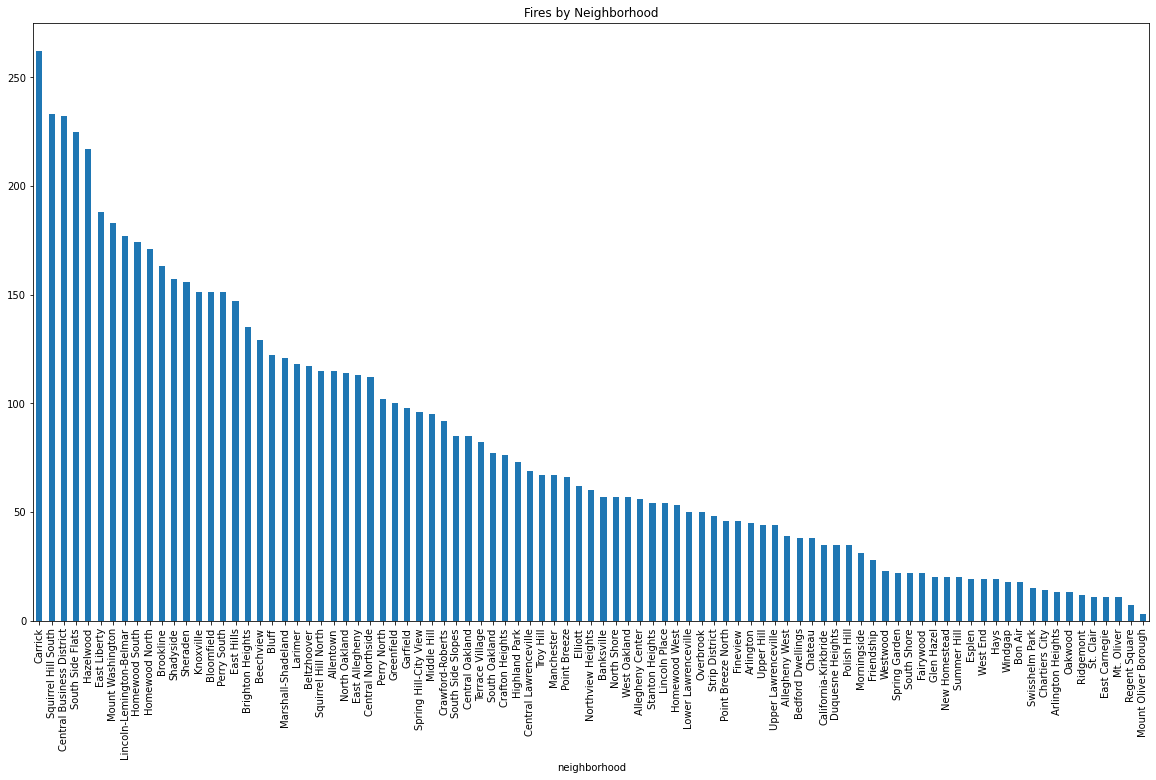

In [7]:
data1.groupby('neighborhood').count().sort_values(ascending= False).plot.bar(figsize = (20, 11), title = "Fires by Neighborhood")

## Ryan Armendariz-Lopez: Pools
Pools are a great way to have fun in the sun with the family. They are also a great place to die! Every year 360 people die from drowning in pools, that's why we are looking at which neighborhoods have the most pools.

#### First, we have to import pandas:

In [9]:
import pandas as pd

#### Now, we can start:

In [10]:
#Creates a dataframe for our csv
pools = pd.read_csv('pool.csv',index_col = 'neighborhood')

#Creates a query mask that isolates all pools from the list
pool = pools['type'] == 'Pool'
pools = pools[pool].iloc[:,2]

#Groups the data by neighborhoods, then counts the number of pools in each neighborhood and sorts
pools = pools.groupby('neighborhood').count().sort_values(ascending = False)

#### Now, we can plot:

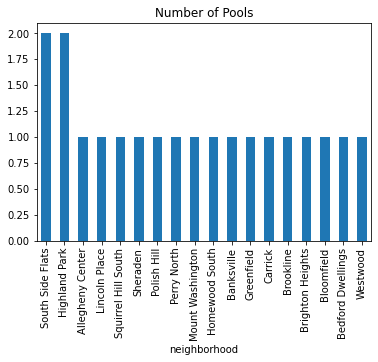

In [11]:
#Plots data
pools.plot.bar(title = "Number of Pools")

### So, what did we learn?

We learned that South Side Flats and Highland Park have the most pools. Which means that these two neighborhoods have the highest capacity for swimmers, which also means a higher chances of drowning!

## Overall Result

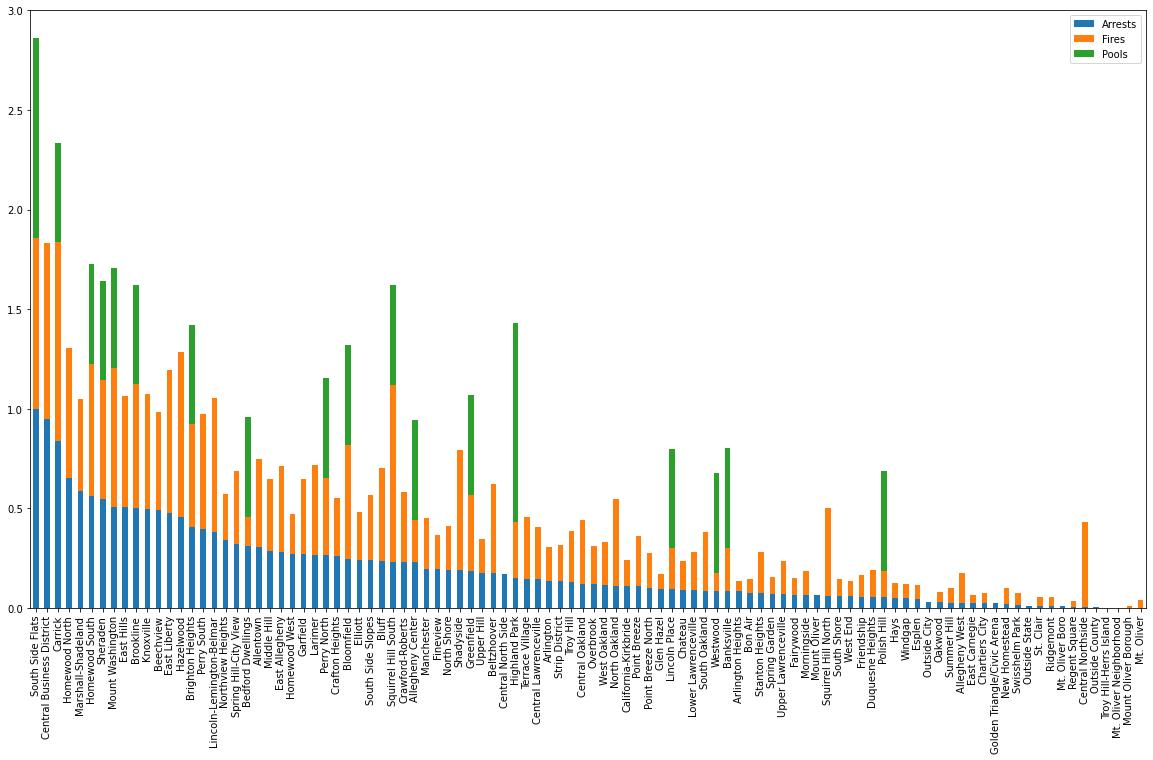

In [46]:
df = pd.concat([numArrest/numArrest.max(), data1.groupby('neighborhood').count()/data1.groupby('neighborhood').count().max(), pools/pools.max()], keys = ["Arrests", "Fires", "Pools"], axis = 1).fillna(value=0)
df.plot.bar(stacked=True, figsize=(20,11))

## South Side Flats for the win!
With Carrick not far behind, taking second place

### Ryan
When I saw that Southside Flats was the deadliest city, I didn’t know what to think! I had been there before, and everything was fine. Looking at the fire incidents, the crime rate, and the pools;  it seems my conclusions were wrong. I always like some extra danger, so Southside Flats looks like the perfect place to live!
### Wabona
Doing this assignment to discover which neighborhood in Pittsburgh was the most perilous was very interesting. Finding out that South Side Flats was the most dangerous neighborhood overall was quite surprising to me. Weirdly enough, I thought beforehand that it would be one of the safest places to live in! Seeing how different metrics combined into an overarching picture put clarity to this assignment as a whole. 
### Jaclyn
It was interesting to see the different statistics and how that data correlates to each neighborhood. I haven't seen much of Pittsburgh so I did not know what to expect. With a quick Google search, I found out that South Side Flats is known for their buzzing nightlife and party culture, which I think only adds to the "bestness" of the neighborhood. If I need any more chaos in my life, I now know where I'd be able to find it in Pittsburgh.